# Data and Packages

In [1]:
!git lfs install

Git LFS initialized.


In [2]:
!git clone https://huggingface.co/ctheodoris/Geneformer

Cloning into 'Geneformer'...
remote: Enumerating objects: 966, done.
remote: Counting objects: 100% (317/317), done.
remote: Compressing objects: 100% (284/284), done.
remote: Total 966 (delta 191), reused 32 (delta 32), pack-reused 649 (from 1)
Receiving objects: 100% (966/966), 4.72 MiB | 6.35 MiB/s, done.
Resolving deltas: 100% (567/567), done.
Filtering content: 100% (27/27), 1.47 GiB | 129.97 MiB/s, done.


In [3]:
cd /content/Geneformer

/content/Geneformer


In [4]:
pip install .

Processing /content/Geneformer
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import os
import scanpy as sc

In [6]:
import pandas as pd

In [7]:
from geneformer import TranscriptomeTokenizer

In [8]:
import pickle

# Tokenization

In [10]:
project_dir = '/content/drive/MyDrive/Final_project_ddls_2024'

In [11]:
h5ad_files_dir = os.path.join(project_dir, 'h5ad_files')

In [13]:
h5ad_org_file_path = os.path.join(h5ad_files_dir, 'final_project_labelled_adata.h5ad')

In [17]:
h5ad_org_file_path

'/content/drive/MyDrive/Final_project_ddls_2024/h5ad_files/final_project_labelled_adata.h5ad'

In [18]:
# Load the file with scanpy
adata = sc.read_h5ad(h5ad_org_file_path)

In [19]:
adata

AnnData object with n_obs × n_vars = 18171 × 21714
    obs: 'disease_status', 'disease_status_encoded', 'celltype', 'total_counts'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_id'
    uns: 'donor_colors'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'spatial'

In [25]:
# Calculate the counts for each category
counts = adata.obs['disease_status'].value_counts()
counts

,count
disease_status,
ctrl,7586
obese,7581
T2D,2081
T1D,923


In [26]:
# Sum the gene expression counts across all genes (for each cell) to get total read counts
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [27]:
# Add Ensembl ID variable metadata
adata.var['ensembl_id'] = adata.var_names

In [34]:
file_to_tokenize_dir = os.path.join(project_dir, 'File_to_tokenize')

In [35]:
h5ad_file_path = os.path.join(file_to_tokenize_dir, 'final_project_labelled_adata_tokenizer_ready.h5ad')
adata.write(h5ad_file_path)

In [36]:
tokenized_file_output_dir = os.path.join(project_dir, 'Tokenized_files')

In [37]:
# Automatically create the dictionary from the .obs columns
metadata_dict = {col: col for col in adata.obs.columns}

In [42]:
metadata_dict

{'disease_status': 'disease_status',
 'disease_status_encoded': 'disease_status_encoded',
 'celltype': 'celltype',
 'total_counts': 'total_counts',
 'n_counts': 'n_counts'}

In [38]:
# Initialize the tokenizer with the metadata dictionary
model_input_size = 2048
tk = TranscriptomeTokenizer(metadata_dict,
                            nproc=8,
                            chunk_size=512,
                           model_input_size=model_input_size,
                            special_token=False) # metadata_dict collapse_gene_ids=False)  model_input_size = 2048, special_token = False

In [40]:
output_prefix = 'spatial_sc_pancreas_diabetic_2048'

In [43]:
tk.tokenize_data(file_to_tokenize_dir,
                 tokenized_file_output_dir,
                 output_prefix,
                 file_format="h5ad",
                 use_generator = False)

Tokenizing /content/drive/MyDrive/Final_project_ddls_2024/File_to_tokenize/final_project_labelled_adata_tokenizer_ready.h5ad


/content/Geneformer/geneformer/tokenizer.py:473: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in adata.var["ensembl_id_collapsed"][coding_miRNA_loc]
/content/Geneformer/geneformer/tokenizer.py:476: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coding_miRNA_ids = adata.var["ensembl_id_collapsed"][coding_miRNA_loc]


/content/drive/MyDrive/Final_project_ddls_2024/File_to_tokenize/final_project_labelled_adata_tokenizer_ready.h5ad has no column attribute 'filter_pass'; tokenizing all cells.
Creating dataset.


# Cell state classification

In [ ]:
!git lfs install

Git LFS initialized.


In [ ]:
!git clone https://huggingface.co/ctheodoris/Geneformer

Cloning into 'Geneformer'...
remote: Enumerating objects: 966, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 966 (delta 43), reused 32 (delta 32), pack-reused 905 (from 1)
Receiving objects: 100% (966/966), 4.67 MiB | 7.15 MiB/s, done.
Resolving deltas: 100% (600/600), done.
Filtering content: 100% (27/27), 1.47 GiB | 44.79 MiB/s, done.


In [ ]:
cd /content/Geneformer

/content/Geneformer


In [ ]:
pip install .

Processing /content/Geneformer
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from geneformer import Classifier

In [ ]:
import datetime
import os
import scanpy as sc

In [ ]:
import pandas as pd

In [ ]:
import pickle

In [ ]:
current_path = os.getcwd()

In [ ]:
model_path = os.path.join(current_path, 'gf-6L-30M-i2048')
print(model_path)

/content/Geneformer/gf-6L-30M-i2048


In [ ]:
tokenized_file_output_dir = '/content/drive/MyDrive/Final_project_ddls_2024/Tokenized_files'

## Fine-tuning of model towards diabetic *cells*

In [ ]:
## Prepare the data ##

current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
output_prefix = f"cell_classifier_data_diabetes_{datestamp}"
output_dir_prep = "/content/drive/MyDrive/Final_project_ddls_2024/Cell_state_data_prep_for_fine_tuning"
os.makedirs(output_dir_prep, exist_ok=True)


In [ ]:

# Define the input data path
tokenized_file_output_dir = '/content/drive/MyDrive/Final_project_ddls_2024/Tokenized_files'
input_data_file = os.path.join(tokenized_file_output_dir, 'spatial_sc_pancreas_diabetic_2048.dataset')


# Set split sizes
split_sizes = {"train": 0.7, "valid": 0.15, "test": 0.15}

# Initialize Classifier with relevant settings
classifier = Classifier(
    classifier="cell",
    cell_state_dict={"state_key": "disease_status", "states": "all"},  # Assuming 'disease_diagnosis' is the column in the dataset
    training_args={
        "num_train_epochs": 100,
        "learning_rate": 0.000804,
        "lr_scheduler_type": "polynomial",
        "warmup_steps": 500,
        "weight_decay": 0.258828,
        "per_device_train_batch_size": 100,
        "seed": 42,
    },
    split_sizes=split_sizes,  # Specify the split sizes here
    num_crossval_splits=1,  # 1 for a single split between training and validation
    # stratify_splits_col="disease_status",  # Stratify by 'disease_diagnosis' to keep the proportion of each class
    freeze_layers=2,  # Freeze the first two layers of the model
    forward_batch_size=200,
    max_ncells=None,  # Adjust based on available data size
)

# Prepare the data
classifier.prepare_data(
    input_data_file=input_data_file,  # Specify the path to your tokenized dataset file
    output_directory= output_dir_prep,
    output_prefix="fine_tuned",
)

In [ ]:
from datasets import load_from_disk

In [ ]:
## Fine-tune the model ##
train_data_path = os.path.join(output_dir_prep, "fine_tuned_labeled_train.dataset")
output_dir_fine_tuned_model = f"/content/drive/MyDrive/Final_project_ddls_2024/fine_tuned_model_{output_prefix}"
os.makedirs(output_dir_fine_tuned_model, exist_ok=True)

train_dataset = load_from_disk(train_data_path)

trained_model = classifier.train_classifier(
    model_directory=model_path,  # Path to the pretrained model directory
    num_classes=4,  # Number of classes in 'disease_diagnosis'
    train_data=train_dataset, # Path to training data prepared in the previous step
    eval_data = None,
    output_directory=output_dir_fine_tuned_model,
    predict=False,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: forsell-oliver (forsell-oliver-university-of-gothe

/content/Geneformer/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}


Step,Training Loss
15,1.369400
30,1.234200
45,1.082300
60,1.036100
75,1.028700
90,1.015200
105,1.013900
120,0.915700
135,0.975400
150,0.943400


/content/Geneformer/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
/content/Geneformer/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
/content/Geneformer/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v i

In [ ]:
# Fetching data
id_class_dict_file_path = os.path.join(output_dir_prep, "fine_tuned_id_class_dict.pkl")  # Path to ID-to-class mapping
test_data_path = os.path.join(output_dir_prep, "fine_tuned_labeled_test.dataset")
fine_tuned_model_path = '/content/drive/MyDrive/Final_project_ddls_2024/fine_tuned_model_cell_classifier_data_diabetes_241026182443'
output_dir_fine_tuned_model_eval = f"/content/drive/MyDrive/Final_project_ddls_2024/eval_fine_tuned_model{output_prefix}"
os.makedirs(output_dir_fine_tuned_model_eval, exist_ok=True)

# Set split sizes
split_sizes = {"train": 0.7, "valid": 0.15, "test": 0.15}

# Initialize Classifier with relevant settings
classifier = Classifier(
    classifier="cell",
    cell_state_dict={"state_key": "disease_status", "states": "all"},  # Assuming 'disease_diagnosis' is the column in the dataset
    training_args={
        "num_train_epochs": 100,
        "learning_rate": 0.000804,
        "lr_scheduler_type": "polynomial",
        "warmup_steps": 500,
        "weight_decay": 0.258828,
        "per_device_train_batch_size": 100,
        "seed": 42,
    },
    split_sizes=split_sizes,  # Specify the split sizes here
    num_crossval_splits=1,  # 1 for a single split between training and validation
    # stratify_splits_col="disease_status",  # Stratify by 'disease_diagnosis' to keep the proportion of each class
    freeze_layers=2,  # Freeze the first two layers of the model
    forward_batch_size=200,
    max_ncells=None,  # Adjust based on available data size
)

# Evaluate the model on the test set
all_metrics_test = classifier.evaluate_saved_model(
    model_directory=fine_tuned_model_path,  # Path to the fine-tuned model
    id_class_dict_file=id_class_dict_file_path,  # Path to ID-to-class mapping
    test_data_file=test_data_path,  # Path to test dataset
    output_directory=output_dir_fine_tuned_model_eval,
    output_prefix="evaluation",
    predict=True,
)

# Print the evaluation metrics
print("Test set evaluation metrics:", all_metrics_test)

  0%|          | 0/14 [00:00<?, ?it/s]

Test set evaluation metrics: {'conf_matrix':        ctrl  T2D  obese  T1D
ctrl    940   46    114   10
T2D      56  194     63    1
obese    88   39   1026   17
T1D      23    0     11   98, 'macro_f1': 0.7806802822970964, 'acc': 0.8283198826118855, 'all_roc_metrics': None}


## Evaluation of fine-tuned model

<Figure size 1000x1000 with 0 Axes>

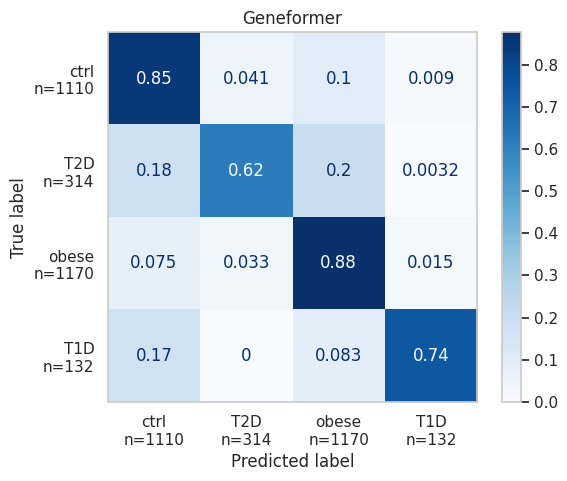

In [ ]:
# Plot the confusion matrix
classifier.plot_conf_mat(
    conf_mat_dict={"Geneformer": all_metrics_test["conf_matrix"]},
    output_directory=output_dir_fine_tuned_model_eval,
    output_prefix="eval_conf_mat",
)

<Figure size 1500x1500 with 0 Axes>

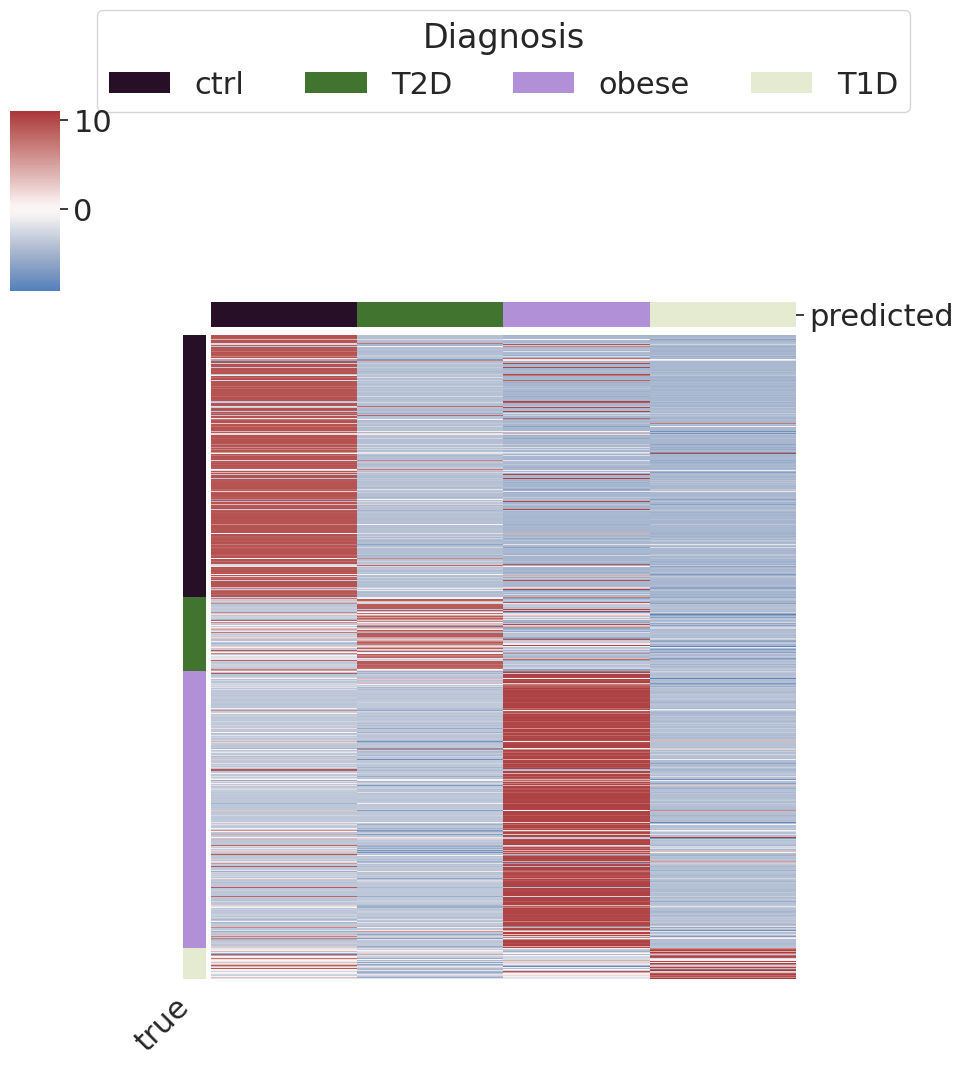

In [ ]:
# Plot predictions
predictions_path = os.path.join(output_dir_fine_tuned_model_eval, "evaluation_pred_dict.pkl")

classifier.plot_predictions(
    predictions_file=predictions_path,
    id_class_dict_file=id_class_dict_file_path,
    title="Diagnosis",
    output_directory=output_dir_fine_tuned_model_eval,
    output_prefix="eval_pred",
)

In [ ]:
roc_metrics_dict

{'Geneformer': None}

In [ ]:
all_metrics_test

{'conf_matrix':        ctrl  T2D  obese  T1D
 ctrl    940   46    114   10
 T2D      56  194     63    1
 obese    88   39   1026   17
 T1D      23    0     11   98,
 'macro_f1': 0.7806802822970964,
 'acc': 0.8283198826118855,
 'all_roc_metrics': None}

In [ ]:
# Plot ROC curve
roc_metrics_dict = {"Geneformer": all_metrics_test["all_roc_metrics"]}
classifier.plot_roc(
    roc_metric_dict=roc_metrics_dict,
    model_style_dict={"Geneformer": {"color": "blue", "linestyle": "-"}},
    title="ROC Curve for Diabetes Classification",
    output_directory=output_dir_fine_tuned_model_eval,
    output_prefix="eval_roc",
)

TypeError: 'NoneType' object is not subscriptable

<Figure size 1000x800 with 0 Axes>

# Embedding extraction as ref for in silico perturbation

In [ ]:
from geneformer import EmbExtractor

In [ ]:
# Set up the EmbExtractor
emb_extractor = EmbExtractor(
    model_type="CellClassifier",  # or "CellClassifier" if you're using a fine-tuned classifier
    emb_mode="cell",
    cell_emb_style="mean_pool",  # Summarize cell embeddings by mean pooling
    max_ncells=None,  # Maximum number of cells to process
    emb_layer=-1,  # Use the second to last layer's embeddings
    emb_label=["disease_status","celltype"],  # Column in .dataset to use as labels
    labels_to_plot=["disease_status","celltype"], # Labels to include in plots
    num_classes=4
)


output_dir_fine_tuned_model_emb = f"/content/drive/MyDrive/Final_project_ddls_2024/emb_fine_tuned_model{output_prefix}"
os.makedirs(output_dir_fine_tuned_model_emb, exist_ok=True)

# Extract embeddings
embedding_output_dir = output_dir_fine_tuned_model_emb
embedding_output_prefix = "embedding_output"
input_data_file_path = os.path.join(tokenized_file_output_dir, 'spatial_sc_pancreas_diabetic_2048.dataset')

embs = emb_extractor.extract_embs(
    model_directory=fine_tuned_model_path,
    input_data_file=input_data_file_path,
    output_directory=embedding_output_dir,
    output_prefix=embedding_output_prefix,
)

  0%|          | 0/182 [00:00<?, ?it/s]

In [ ]:
output_dir_fine_tuned_model_emb = '/content/drive/MyDrive/Final_project_ddls_2024/emb_fine_tuned_modelcell_classifier_data_diabetes_241026202218'

In [ ]:
embs_path = os.path.join(output_dir_fine_tuned_model_emb,'embedding_output.csv')

In [ ]:
# Load the embs .csv file into a DataFrame
pd_embs = pd.read_csv(embs_path)

/usr/local/lib/python3.10/dist-packages/anndata/utils.py:304: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


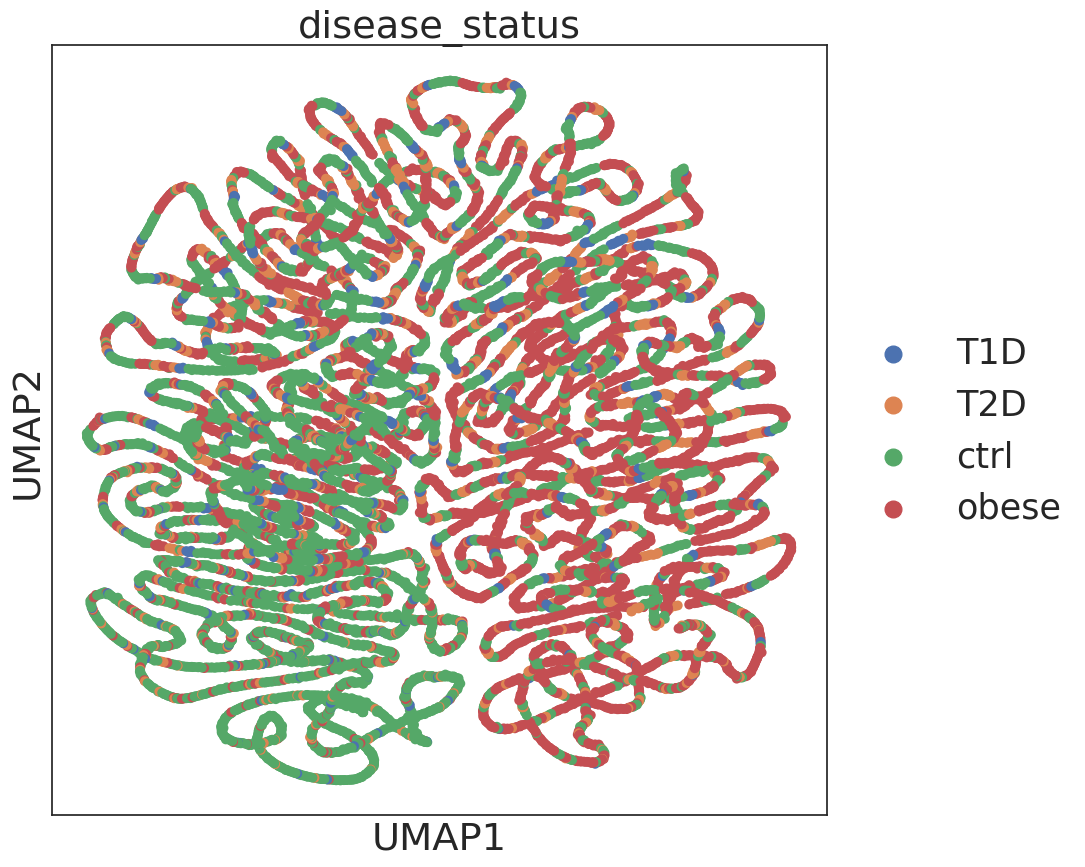

/usr/local/lib/python3.10/dist-packages/anndata/utils.py:304: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Set up the EmbExtractor
emb_extractor = EmbExtractor(
    model_type="CellClassifier",  # or "CellClassifier" if you're using a fine-tuned classifier
    emb_mode="cell",
    cell_emb_style="mean_pool",  # Summarize cell embeddings by mean pooling
    max_ncells=1000,  # Maximum number of cells to process
    emb_layer=-1,  # Use the second to last layer's embeddings
    emb_label=["disease_status","celltype"],  # Column in .dataset to use as labels
    labels_to_plot=["disease_status","celltype"], # Labels to include in plots
    num_classes=4
)

emb_extractor.plot_embs(pd_embs,
          plot_style ="umap",
          output_directory = output_dir_fine_tuned_model_emb,
          output_prefix = "emb_umap",
          max_ncells_to_plot=1000,
          kwargs_dict=None)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2250x2250 with 0 Axes>

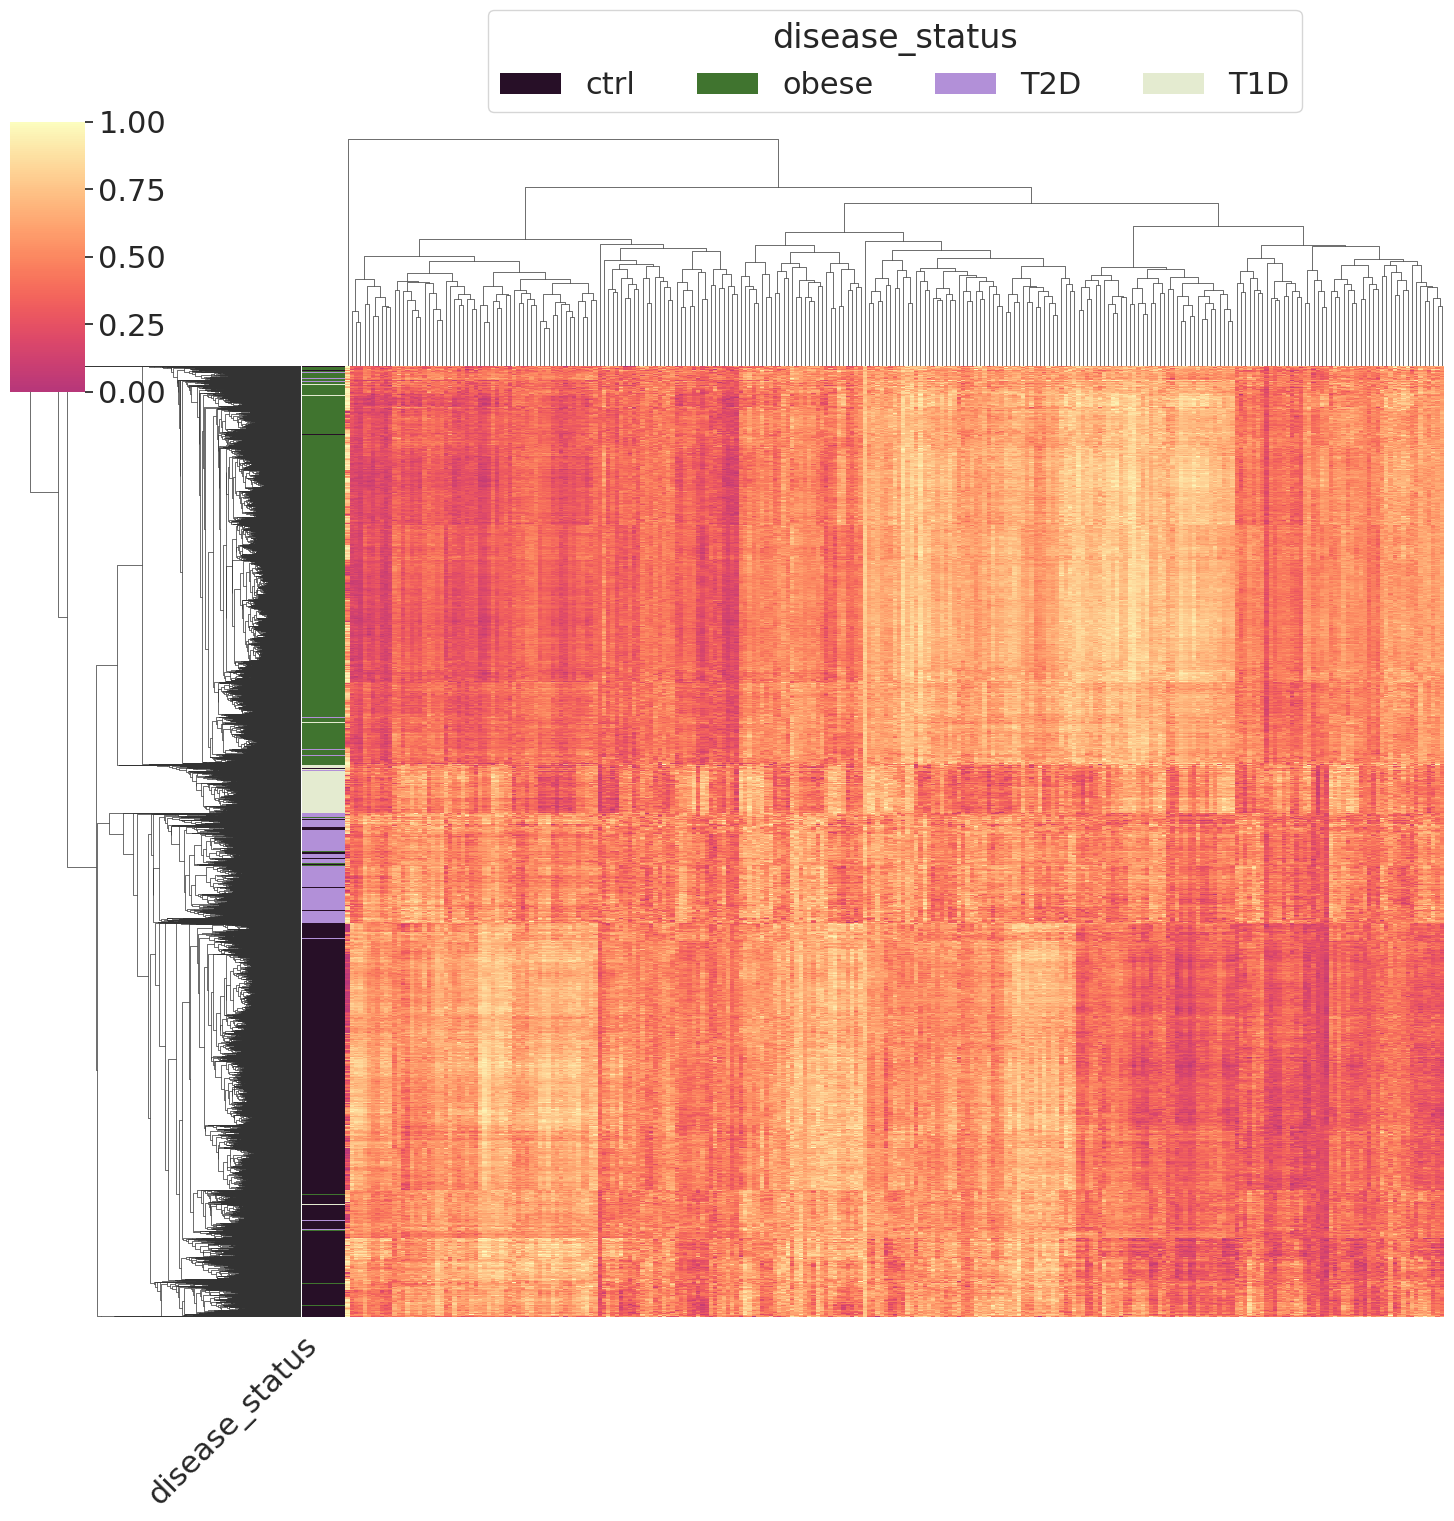

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x1000 with 0 Axes>

<Figure size 2250x2250 with 0 Axes>

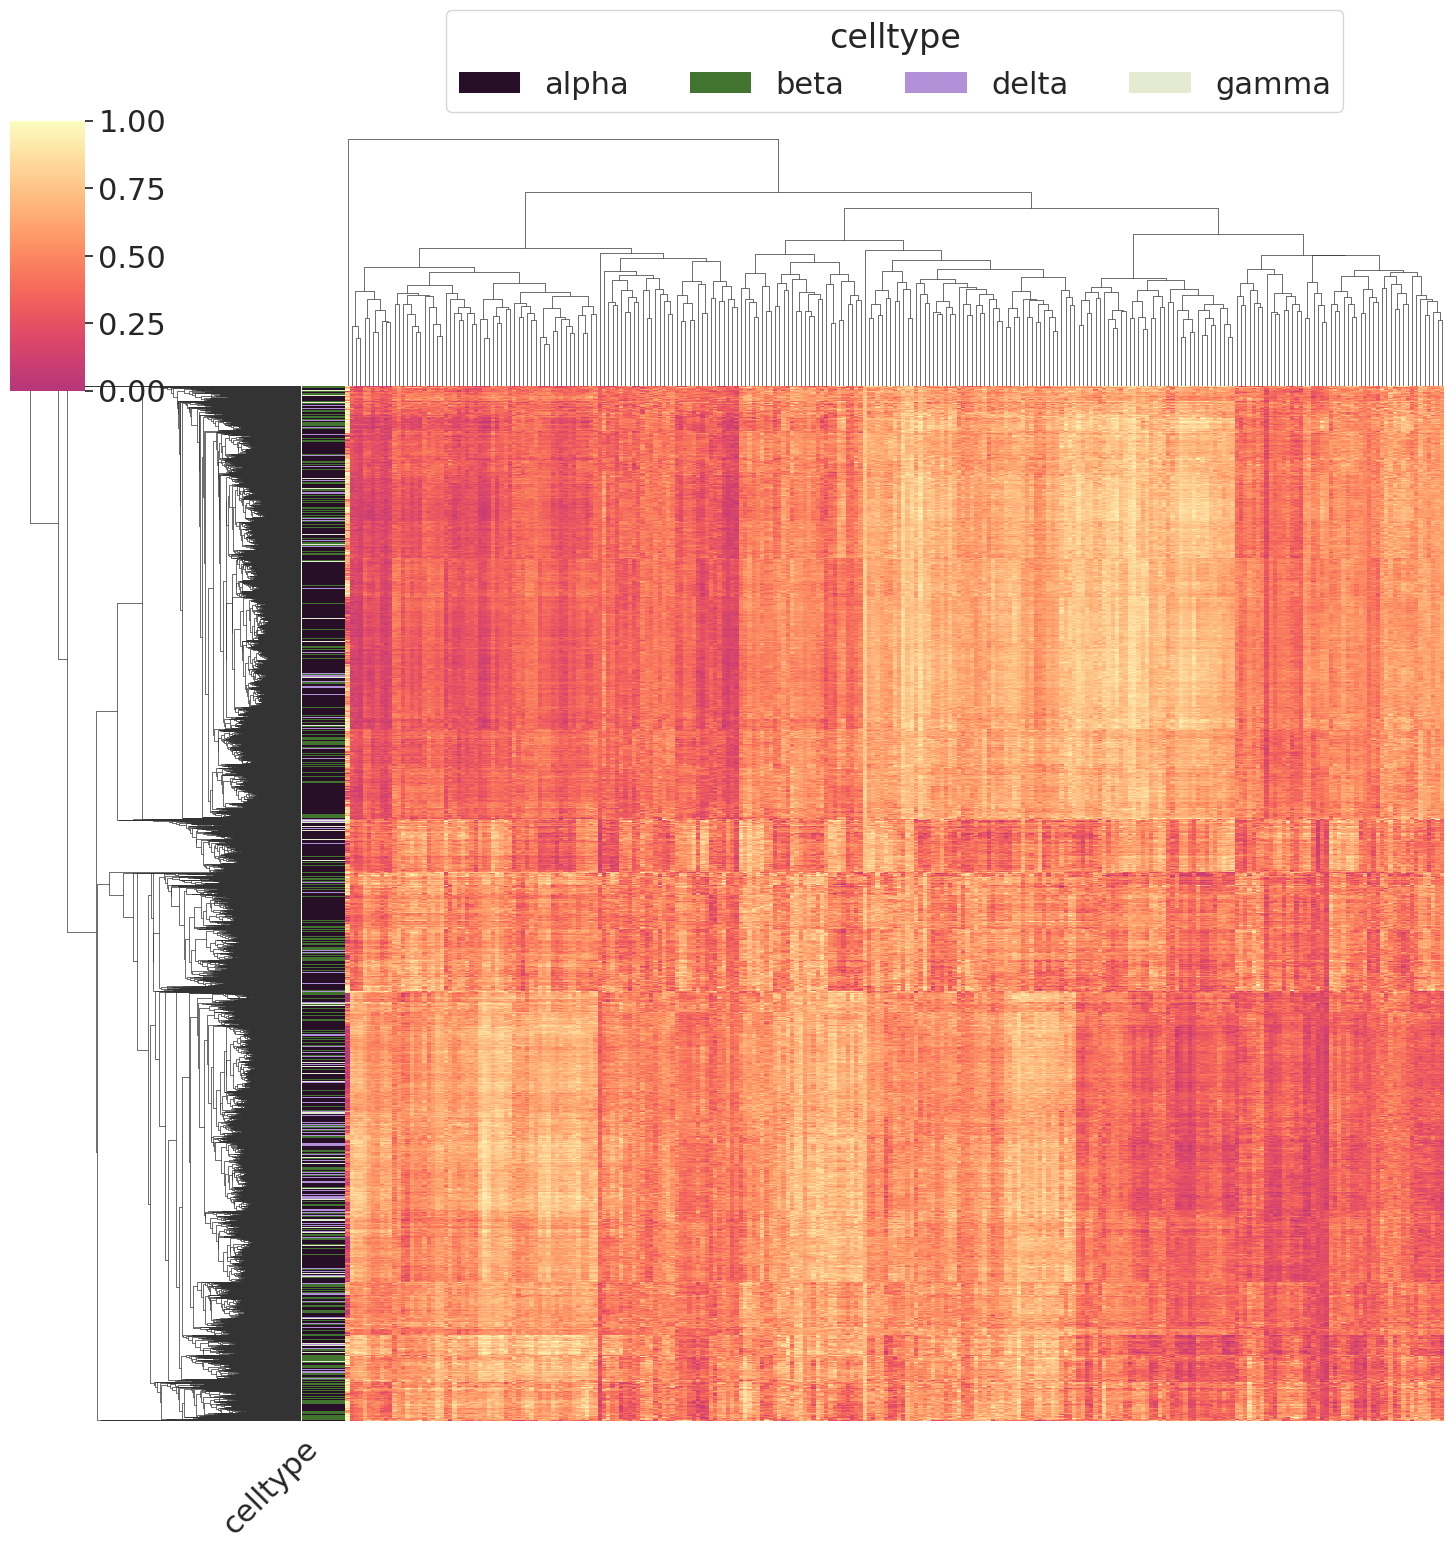

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Set up the EmbExtractor
emb_extractor = EmbExtractor(
    model_type="CellClassifier",  # or "CellClassifier" if you're using a fine-tuned classifier
    emb_mode="cell",
    cell_emb_style="mean_pool",  # Summarize cell embeddings by mean pooling
    max_ncells=1000,  # Maximum number of cells to process
    emb_layer=-1,  # Use the second to last layer's embeddings
    emb_label=["disease_status","celltype"],  # Column in .dataset to use as labels
    labels_to_plot=["disease_status","celltype"], # Labels to include in plots
    num_classes=4
)

emb_extractor.plot_embs(pd_embs,
          plot_style ="heatmap",
          output_directory = output_dir_fine_tuned_model_emb,
          output_prefix = "emb_heatmap",
          max_ncells_to_plot= 1000,
          kwargs_dict=None)

In [ ]:
# Set up the EmbExtractor
emb_extractor = EmbExtractor(
    model_type="CellClassifier",  # or "CellClassifier" if you're using a fine-tuned classifier
    emb_mode="cell",
    cell_emb_style="mean_pool",  # Summarize cell embeddings by mean pooling
    max_ncells=1000,  # Maximum number of cells to process
    emb_layer=-1,  # Use the second to last layer's embeddings
    emb_label=None,  # Column in .dataset to use as labels
    labels_to_plot=["disease_status","celltype"], # Labels to include in plots
    num_classes=4,
    summary_stat="exact_median"
)

input_data_file_path = os.path.join(tokenized_file_output_dir, 'spatial_sc_pancreas_diabetic_2048.dataset')
fine_tuned_model_path = '/content/drive/MyDrive/Final_project_ddls_2024/fine_tuned_model_cell_classifier_data_diabetes_241026182443'
output_dir_fine_tuned_model_emb = '/content/drive/MyDrive/Final_project_ddls_2024/emb_fine_tuned_modelcell_classifier_data_diabetes_241026202218'

emb_extractor.get_state_embs(cell_states_to_model ={"state_key": "disease_status", "start_state": "T1D", "goal_state": "ctrl", "alt_states":["T2D", "obese"]},
               model_directory=fine_tuned_model_path,
               input_data_file = input_data_file_path,
               output_directory= output_dir_fine_tuned_model_emb,
               output_prefix="state_emb_for_insilico_perturb",
               output_torch_embs=True)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

{'T1D': tensor([-1.2933e-02, -1.2144e-01, -1.0913e-01,  2.5253e-01, -2.7131e-01,
         -2.3698e-02,  6.0020e-02,  2.2619e-03, -1.3502e-01,  1.4077e-01,
          6.8012e-02, -4.4771e-02, -1.1818e-02,  8.3436e-02, -4.0576e-02,
         -1.3971e-01,  1.3041e-01, -5.0729e-03,  1.8700e-01, -2.2777e-02,
          3.0139e-02, -4.1201e-02, -2.0277e-01, -1.2696e-01,  3.1137e-01,
          2.9167e-01, -1.1320e-01, -5.8033e-02, -3.2877e-02, -1.2037e-01,
         -1.1445e+00,  1.2426e-02, -3.1081e-01, -5.7223e-02, -9.8249e-02,
         -8.7180e-03, -2.0088e-01, -1.4876e-01,  2.1337e-02,  1.4789e-02,
         -9.6481e-04, -3.1563e-02, -9.2089e-03,  2.1815e-03, -1.7689e-02,
         -3.1440e-02, -2.3479e-01,  2.6789e-01,  1.2297e-01,  1.8680e-02,
         -8.2681e-02, -2.2919e-01, -2.5585e-01, -1.4399e-01,  3.9929e-02,
         -3.1767e-02, -6.0156e-02, -5.4755e-02, -4.3258e-02, -6.8082e-02,
         -8.9848e-03, -8.2041e-02,  2.0316e-01, -2.3448e-02, -1.4458e-01,
         -6.7595e-02, -6.0120e-

# In-silico perturbation of genes

In [ ]:
!git lfs install

Git LFS initialized.


In [ ]:
!git clone https://huggingface.co/ctheodoris/Geneformer

Cloning into 'Geneformer'...
remote: Enumerating objects: 966, done.
remote: Counting objects: 100% (317/317), done.
remote: Compressing objects: 100% (284/284), done.
remote: Total 966 (delta 191), reused 32 (delta 32), pack-reused 649 (from 1)
Receiving objects: 100% (966/966), 4.72 MiB | 22.68 MiB/s, done.
Resolving deltas: 100% (567/567), done.
Filtering content: 100% (27/27), 1.47 GiB | 193.40 MiB/s, done.


In [ ]:
cd /content/Geneformer

/content/Geneformer


In [ ]:
pip install .

Processing /content/Geneformer
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 49.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from geneformer import InSilicoPerturber

In [ ]:
import os

In [ ]:
import pickle

In [ ]:
!cp -r /content/drive/MyDrive/Final_project_ddls_2024/ /content/

In [ ]:
# Load the pickle files
output_dir_fine_tuned_model_emb = '/content/Final_project_ddls_2024/emb_fine_tuned_modelcell_classifier_data_diabetes_241026202218'
state_embs_path = os.path.join(output_dir_fine_tuned_model_emb,'state_emb_for_insilico_perturb.pkl')

with open(state_embs_path, 'rb') as f:
    state_embs = pickle.load(f)

In [ ]:
# cell_type_to_perturb = 'alpha'

isp = InSilicoPerturber(perturb_type="delete",
                        perturb_rank_shift=None,
                        genes_to_perturb="all",
                        model_type="CellClassifier",
                        num_classes=4,
                        emb_mode="cell",
                        filter_data= None, # {"celltype":[cell_type_to_perturb]}, # {"celltype":["alpha"]}, # ['alpha', 'beta', 'delta', 'gamma']
                        cell_states_to_model={"state_key": "disease_status",
                                              "start_state": "ctrl",
                                              "goal_state": "T1D",
                                              "alt_states": ["T2D", "obese"]},
                        state_embs_dict = state_embs,
                        max_ncells=1000,
                        emb_layer=0,
                        forward_batch_size=1000,
                        nproc=16)

output_dir_fine_tuned_model_perturb = f"/content/Final_project_ddls_2024/perturbations_deletions_{cell_type_to_perturb}_healthy_to_disease_fine_tuned_model_cell_classifier_data_diabetes_271024"
os.makedirs(output_dir_fine_tuned_model_perturb, exist_ok=True)
fine_tuned_model_path = '/content/Final_project_ddls_2024/fine_tuned_model_cell_classifier_data_diabetes_241026182443'
tokenized_file_output_dir = '/content/Final_project_ddls_2024/Tokenized_files'
input_data_file_path = os.path.join(tokenized_file_output_dir, 'spatial_sc_pancreas_diabetic_2048.dataset')


isp.perturb_data(model_directory= fine_tuned_model_path,
                 input_data_file = input_data_file_path,
                 output_directory=output_dir_fine_tuned_model_perturb,
                 output_prefix="perturbed_genes")

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
output_dir_fine_tuned_model_perturb_stats = '/content/drive/MyDrive/Final_project_ddls_2024/stats_perturbations_healthy_to_disease_fine_tuned_modelcell_classifier_data_diabetes_271024'
os.makedirs(output_dir_fine_tuned_model_perturb_stats, exist_ok=True)

In [ ]:
from geneformer import InSilicoPerturberStats
ispstats = InSilicoPerturberStats(mode="goal_state_shift",
   cell_states_to_model={"state_key": "disease_status",
                         "start_state": "ctrl",
                         "goal_state": "T1D",
                         "alt_states": ["T2D", "obese"]})

ispstats.get_stats(input_data_directory = output_dir_fine_tuned_model_perturb,
                   null_dist_data_directory = output_dir_fine_tuned_model_perturb,
                   output_directory=output_dir_fine_tuned_model_perturb_stats,
                   output_prefix="perturbed_genes_stats")

  0%|          | 0/1846 [00:00<?, ?it/s]

  0%|          | 0/11061 [00:00<?, ?it/s]

  0%|          | 0/11061 [00:00<?, ?it/s]

/content/Geneformer/geneformer/in_silico_perturber_stats.py:436: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cos_sims_full_df = pd.concat([cos_sims_full_df, cos_sims_df_i])


In [ ]:
import pandas as pd

# Load the dataset
stats_perturb_dir = '/content/drive/MyDrive/Final_project_ddls_2024/stats_perturbations_fine_tuned_modelcell_classifier_data_diabetes_241026202218/'
stats_perturb_file_path = os.path.join(stats_perturb_dir,'perturbed_genes_stats.csv')
data = pd.read_csv(stats_perturb_file_path)

# Define Ensembl IDs for genes of interest
genes_of_interest_ensembl = {
    'PPY': 'ENSG00000108849',
    'somatostatin': 'ENSG00000157005',
    'glucagon': 'ENSG00000115263',
    'insulin': 'ENSG00000254647',
    'ACTB': 'ENSG00000075624'  # Housekeeping gene as control
}

# Find all columns matching 'Alt_end_FDR*' using regex
alt_end_fdr_columns = data.filter(regex=r'Alt_end_FDR').columns

# Apply filtering for significance in any 'Goal_end_FDR' or matching 'Alt_end_FDR*' columns
significant_genes = data[
    (data['Goal_end_FDR'] < 0.05) | (data[alt_end_fdr_columns] < 0.05).any(axis=1)
]

# Also add the genes of interest, regardless of their significance
genes_of_interest_data = data[
    data['Ensembl_ID'].isin(genes_of_interest_ensembl.values())
]

# Combine the significant genes with the genes of interest, ensuring no duplicates
filtered_data = pd.concat([significant_genes, genes_of_interest_data]).drop_duplicates()

# Save the filtered data to a new CSV file
stats_perturb_sig_and_of_interest_file_path = os.path.join(stats_perturb_dir,'perturbed_genes_stats_sig_and_markers.csv')
filtered_data.to_csv(stats_perturb_sig_and_of_interest_file_path, index=False)

# Display the filtered data
print(filtered_data)

       Unnamed: 0   Gene Gene_name       Ensembl_ID  Shift_to_goal_end  \
0           10408  17085      STL3  ENSG00000204248           0.161193   
1            5443   7941      DEF8  ENSG00000140995           0.120861   
2            4123   5901     CASD1  ENSG00000127995           0.094405   
3            6949  10329     RDH13  ENSG00000160439           0.090921   
4            4168   5975     US12M  ENSG00000128626           0.090643   
...           ...    ...       ...              ...                ...   
10306        1790   2494    MANBAL  ENSG00000101363          -0.034187   
10316       10438  17134      NG37  ENSG00000204396          -0.034658   
10388        2686   3773      HPS5  ENSG00000110756          -0.037433   
10409        7474  11214    GIOT-3  ENSG00000164631          -0.038119   
10467        6962  10351    SRAG-3  ENSG00000160679          -0.040552   

       Shift_to_alt_end_T2D  Shift_to_alt_end_obese  Goal_end_vs_random_pval  \
0                  0.140047    

In [ ]:
# Subset filtered_data for 'Goal_end_FDR' < 0.05
goal_end_fdr_significant = filtered_data[filtered_data['Goal_end_FDR'] < 0.05]

# Subset filtered_data for 'Alt_end_FDR_T2D' < 0.05
alt_end_fdr_t2d_significant = filtered_data[filtered_data['Alt_end_FDR_T2D'] < 0.05]

# Subset filtered_data for 'Alt_end_FDR_obese' < 0.05
alt_end_fdr_obese_significant = filtered_data[filtered_data['Alt_end_FDR_obese'] < 0.05]

# Subset filtered_data to only include the genes_of_interest_ensembl
genes_of_interest_subset = filtered_data[
    filtered_data['Ensembl_ID'].isin(genes_of_interest_ensembl.values())
]

# Display the number of entries in each subset
print(f"Goal_end_FDR significant genes: {len(goal_end_fdr_significant)}")
print(f"Alt_end_FDR_T2D significant genes: {len(alt_end_fdr_t2d_significant)}")
print(f"Alt_end_FDR_obese significant genes: {len(alt_end_fdr_obese_significant)}")
print(f"Genes of interest subset: {len(genes_of_interest_subset)}")


Goal_end_FDR significant genes: 143
Alt_end_FDR_T2D significant genes: 134
Alt_end_FDR_obese significant genes: 124
Genes of interest subset: 5


In [ ]:
genes_of_interest_subset ENSG00000075624

,Unnamed: 0,Gene,Gene_name,Ensembl_ID,Shift_to_goal_end,Shift_to_alt_end_T2D,Shift_to_alt_end_obese,Goal_end_vs_random_pval,Alt_end_vs_random_pval_T2D,Alt_end_vs_random_pval_obese,Goal_end_FDR,Alt_end_FDR_T2D,Alt_end_FDR_obese,N_Detections,Sig
42,2537,3569,PPY,ENSG00000108849,0.032289,0.015096,-0.002103,1.547151e-05,2.804612e-03,8.421603e-01,2.410287e-03,0.143620,9.536380e-01,95,1
57,3098,4355,GCG,ENSG00000115263,0.014535,0.002712,-0.008675,1.505206e-08,2.181341e-01,1.454394e-23,4.268996e-06,0.638148,1.462459e-20,783,1
92,944,1312,ACTB,ENSG00000075624,-0.001341,-0.007047,0.008365,1.550858e-04,2.547906e-09,3.330883e-03,1.531610e-02,0.000001,1.588056e-01,112,1
108,10888,18665,ILPR,ENSG00000254647,-0.007985,0.008677,-0.025947,1.383037e-45,1.218818e-08,5.362617e-87,1.912221e-42,0.000004,2.965795e-83,615,1
4561,6695,9899,SMST,ENSG00000157005,0.020742,0.011867,-0.002590,1.746350e-02,1.012208e-05,2.009987e-01,3.334619e-01,0.002112,6.051296e-01,362,0


## Gene enrichment analysis

In [ ]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 7.2 MB/s eta 0:00:00


In [ ]:
import gseapy as gp

In [ ]:
# Define the function to perform enrichment analysis
def run_enrichment_analysis(genes, library="KEGG_2021_Human", pval_cutoff=0.05):
    """
    Run Enrichr enrichment analysis on the provided gene list.

    Parameters:
    - genes (list): List of gene names.
    - library (str): The Enrichr library to use for enrichment analysis.
    - pval_cutoff (float): Cutoff for adjusted p-value.

    Returns:
    - DataFrame with enriched terms passing the pval_cutoff.
    """
    enrichment_results = gp.enrichr(
        gene_list=genes,
        gene_sets=library,
        organism='Human',  # Species name
        cutoff=pval_cutoff  # P-value cutoff
    )
    # Filter the results based on the adjusted p-value
    enriched_df = enrichment_results.results[enrichment_results.results['Adjusted P-value'] < pval_cutoff]
    return enriched_df

In [ ]:
# Lists to hold the gene Ensembl IDs for enrichment analysis
goal_end_genes = goal_end_fdr_significant['Gene_name'].tolist()
alt_end_t2d_genes = alt_end_fdr_t2d_significant['Gene_name'].tolist()
alt_end_obese_genes = alt_end_fdr_obese_significant['Gene_name'].tolist()

# Run enrichment analysis for each list and save results
goal_end_enriched = run_enrichment_analysis(goal_end_genes, library="KEGG_2021_Human", pval_cutoff=0.05)
alt_end_t2d_enriched = run_enrichment_analysis(alt_end_t2d_genes, library="KEGG_2021_Human", pval_cutoff=0.05)
alt_end_obese_enriched = run_enrichment_analysis(alt_end_obese_genes, library="KEGG_2021_Human", pval_cutoff=0.05)


In [ ]:
goal_end_enriched

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Ribosome,7/158,0.000143,0.016442,0,0,6.717082,59.459585,RPS14;RPS19;RPL23;RPLP0;RPL8;RPL19;RPS12
1,KEGG_2021_Human,Coronavirus disease,8/232,0.000270,0.016442,0,0,5.193915,42.687544,RPS14;JUN;RPS19;RPL23;RPLP0;RPL8;RPL19;RPS12
2,KEGG_2021_Human,Pancreatic secretion,5/102,0.000832,0.027320,0,0,7.380846,52.341729,PRSS1;CPB1;CTRB2;PRSS2;PNLIP
3,KEGG_2021_Human,Viral myocarditis,4/60,0.000896,0.027320,0,0,10.175231,71.408467,HLA-B;HLA-F;ACTB;ACTG1


In [ ]:
alt_end_t2d_enriched

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Ribosome,7/158,0.000095,0.007913,0,0,7.196381,66.624808,RPS19;RPL23;RPLP0;RPL23A;RPL29;RPS23;RPS12
1,KEGG_2021_Human,Pancreatic secretion,5/102,0.000620,0.025742,0,0,7.899385,58.339533,PRSS1;CPB1;AMY2A;CTRB2;PNLIP
2,KEGG_2021_Human,Coronavirus disease,7/232,0.000974,0.026953,0,0,4.811444,33.362043,RPS19;RPL23;RPLP0;RPL23A;RPL29;RPS23;RPS12


In [ ]:
alt_end_obese_enriched

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Pancreatic secretion,8/102,2.342786e-07,0.000018,0,0,14.513573,221.575163,PNLIPRP1;CPA2;PNLIPRP2;PRSS1;CPB1;AMY2A;PRSS2;...
1,KEGG_2021_Human,Fat digestion and absorption,4/43,1.440641e-04,0.005474,0,0,16.954701,149.968604,PNLIPRP1;PNLIPRP2;CLPS;PNLIP
